# Логистическая регрессия (Logistic Regression)

---

**Источники:**


[]()

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__

'0.24.1'

## Загрузка данных

[Источник (CustomerChurnRate)](https://www.kaggle.com/gangliu/customerchurnrate).

In [8]:
df = pd.read_csv('./../../data/ChurnData.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.00,33.00,7.00,136.00,5.00,5.00,0.00,1.00,1.00,4.40,20.75,0.00,15.25,35.70,42.00,211.45,125.00,1.00,1.00,0.00,1.00,1.00,0.00,1.48,3.03,4.91,4.00,1.00
1,33.00,33.00,12.00,33.00,2.00,0.00,0.00,0.00,0.00,9.45,0.00,0.00,0.00,0.00,288.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.25,3.24,3.50,1.00,1.00
2,23.00,30.00,9.00,30.00,1.00,2.00,0.00,0.00,0.00,6.30,0.00,0.00,0.00,0.00,157.05,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.84,3.24,3.40,3.00,0.00
3,38.00,35.00,5.00,76.00,2.00,10.00,1.00,1.00,1.00,6.05,45.00,50.10,23.25,64.90,239.55,1873.05,880.00,1.00,1.00,1.00,1.00,1.00,1.00,1.80,3.81,4.33,4.00,0.00
4,7.00,35.00,14.00,80.00,2.00,15.00,0.00,1.00,0.00,7.10,22.00,0.00,23.75,0.00,47.45,166.10,145.00,1.00,0.00,0.00,1.00,1.00,0.00,1.96,3.09,4.38,3.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.00,44.00,24.00,83.00,1.00,23.00,0.00,1.00,0.00,17.35,24.50,0.00,14.25,0.00,973.10,1343.50,720.00,0.00,0.00,0.00,0.00,1.00,0.00,2.85,3.20,4.42,3.00,0.00
196,34.00,23.00,3.00,24.00,1.00,7.00,0.00,1.00,0.00,6.00,28.00,0.00,12.75,0.00,203.25,959.40,435.00,0.00,0.00,0.00,1.00,1.00,0.00,1.79,3.33,3.18,3.00,0.00
197,6.00,32.00,10.00,47.00,1.00,10.00,0.00,1.00,0.00,3.85,23.75,0.00,12.50,0.00,29.90,128.45,80.00,0.00,0.00,0.00,1.00,1.00,0.00,1.35,3.17,3.85,3.00,0.00
198,24.00,30.00,0.00,25.00,4.00,5.00,0.00,1.00,1.00,8.70,47.75,0.00,32.75,64.00,186.60,1152.90,780.00,1.00,1.00,1.00,1.00,1.00,1.00,2.16,3.87,3.22,4.00,1.00


In [9]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',  'callcard', 'wireless','churn']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


## Вероятность (Probability)

TODO

## Различия между Линейной (Linear) и Логистической (Logistic) регрессией (Regression)


<img src="images/linear_vs_logistic_regression_2.png" width="600">


В то время как **линейная регрессия** подходит для оценки **непрерывных значений** (например, оценок цены дома), это не лучший инструмент для прогнозирования класса, то есть **дискретных значений**.

Чтобы **оценить класс**, нужно какое-то руководство в том, какой класс будет наиболее вероятным для этого набора признаков. Для этого можно использовать **логистическую регрессию**.

**Логистическая регрессия** - это **разновидность линейной регрессии**, полезная, когда наблюдаемая зависимая переменная $y$ является категориальной. 

**Логистическая регрессия** соответствует специальной s-образной кривой, взяв линейную регрессию и преобразовав числовую оценку в вероятность с помощью следующей функции, которая называется сигмоидной функцией $\sigma$:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Или:
$$
Probability\space of \space Class_1 =  P(y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

В этом уравнении ${\theta^TX}$ - это результат регрессии (сумма переменных, взвешенных коэффициентами), `exp` - экспоненциальная функция, а $\sigma(\theta^TX)$ - сигмоида или [логистическая функция](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5), также называется логистической кривой. Это обычная S-образная форма (сигмовидная кривая).

<img src="images/linear_vs_logistic_regression_1.png" width="600">


Итак, вкратце, логистическая регрессия передает входные данные через логистическую / сигмоиду, но затем обрабатывает результат как вероятность:

<img src="images/log_regr_prob.png" width="400">

Цель алгоритма **логистической регрессии** - найти наилучшие параметры $\theta$ для $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$ таким образом, чтобы наилучшим образом предсказать класс каждого случая.


## Бинарная классификация (ровно 2 класса)

### Предварительная обработка (pre-processing) и выбор (selection) данных

In [10]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(df['churn'])

In [11]:
from sklearn import preprocessing

# нормализация
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Обучение модели (Train)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [14]:
y_predicted = model.predict(X_test)
y_predicted

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1.])

In [15]:
# получить вероятности
y_predicted_prob = model.predict_proba(X_test)
y_predicted_prob

array([[0.56667891, 0.43332109],
       [0.43381164, 0.56618836],
       [0.43405551, 0.56594449],
       [0.54773287, 0.45226713],
       [0.64219401, 0.35780599],
       [0.41636253, 0.58363747],
       [0.61814335, 0.38185665],
       [0.66015828, 0.33984172],
       [0.51083311, 0.48916689],
       [0.48316352, 0.51683648],
       [0.66330554, 0.33669446],
       [0.72512983, 0.27487017],
       [0.40830677, 0.59169323],
       [0.48266091, 0.51733909],
       [0.66569348, 0.33430652],
       [0.45029178, 0.54970822],
       [0.52312601, 0.47687399],
       [0.65758492, 0.34241508],
       [0.51501877, 0.48498123],
       [0.77606382, 0.22393618],
       [0.48323754, 0.51676246],
       [0.53731462, 0.46268538],
       [0.52350395, 0.47649605],
       [0.45452632, 0.54547368],
       [0.52121307, 0.47878693],
       [0.62553078, 0.37446922],
       [0.68532179, 0.31467821],
       [0.7744305 , 0.2255695 ],
       [0.57884315, 0.42115685],
       [0.37266578, 0.62733422],
       [0.

### Оценка качества модели (Evaluation)

####  Матрица ошибок (confusion matrix)

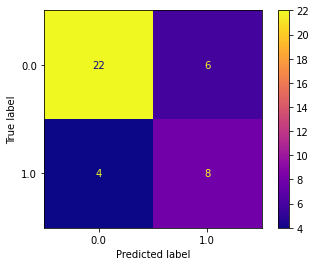

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap='plasma')  

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        28
         1.0       0.57      0.67      0.62        12

    accuracy                           0.75        40
   macro avg       0.71      0.73      0.72        40
weighted avg       0.76      0.75      0.75        40



#### log loss

In [21]:
from sklearn.metrics import log_loss
log_loss(y_test, y_predicted_prob)

0.6037529958070642

## Мультиклассовая классификация (> 2 классов)

### Предварительная обработка (pre-processing) и выбор (selection) данных

In [30]:
df.ed.value_counts()

4.00    59
2.00    48
1.00    40
3.00    36
5.00    17
Name: ed, dtype: int64

In [31]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'churn', 'employ', 'equip']])
y = np.asarray(df['ed'])

In [32]:
from sklearn import preprocessing

# нормализация
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.56469673,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061,  1.56469673,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -0.63910148,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.63910148,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.63910148,
         0.53441472, -0.85972695]])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Обучение модели (Train)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [35]:
y_predicted = model.predict(X_test)
y_predicted

array([4., 4., 4., 1., 4., 1., 1., 1., 1., 4., 4., 1., 2., 4., 4., 4., 4.,
       4., 4., 4., 2., 1., 1., 4., 1., 4., 1., 1., 2., 4., 4., 1., 4., 2.,
       4., 4., 4., 4., 2., 1.])

In [36]:
# получить вероятности
y_predicted_prob = model.predict_proba(X_test)
y_predicted_prob

array([[0.17472793, 0.17582064, 0.20573281, 0.23912385, 0.20459477],
       [0.17439521, 0.18079357, 0.20278917, 0.23514217, 0.20687988],
       [0.17663229, 0.1946123 , 0.20418058, 0.23032829, 0.19424653],
       [0.23973235, 0.21740408, 0.18948312, 0.18453578, 0.16884467],
       [0.16917387, 0.18010793, 0.20505312, 0.23846851, 0.20719657],
       [0.24182698, 0.2116165 , 0.18869903, 0.19136299, 0.1664945 ],
       [0.23055783, 0.20689728, 0.19056564, 0.1999014 , 0.17207785],
       [0.23612838, 0.21316578, 0.18889291, 0.18728553, 0.17452741],
       [0.24723806, 0.20686946, 0.1852415 , 0.19083514, 0.16981584],
       [0.16881061, 0.17772306, 0.20350387, 0.23972641, 0.21023605],
       [0.16763017, 0.1763951 , 0.20410374, 0.24173762, 0.21013337],
       [0.23146231, 0.21958872, 0.19439471, 0.18896221, 0.16559205],
       [0.21762627, 0.22335323, 0.19838491, 0.19540873, 0.16522685],
       [0.1596451 , 0.1835191 , 0.20913735, 0.24266951, 0.20502894],
       [0.20157126, 0.20819374, 0.

### Оценка качества модели (Evaluation)

####  Матрица ошибок (confusion matrix)

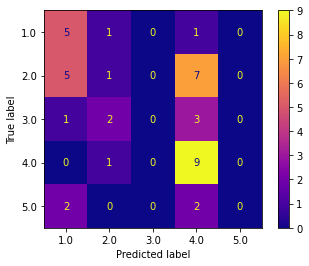

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap='plasma')  

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         1.0       0.38      0.71      0.50         7
         2.0       0.20      0.08      0.11        13
         3.0       0.00      0.00      0.00         6
         4.0       0.41      0.90      0.56        10
         5.0       0.00      0.00      0.00         4

    accuracy                           0.38        40
   macro avg       0.20      0.34      0.23        40
weighted avg       0.23      0.38      0.26        40



/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### log loss

In [39]:
from sklearn.metrics import log_loss
log_loss(y_test, y_predicted_prob)

1.5587597095825643